In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML470_S3_Diabetes_Data_Preprocessed_Concept.xlsx")

# Use HbA1c as time series
series = df['HbA1c']
series.index = pd.date_range(start='2020-01-01', periods=len(series), freq='M')

C:\Users\HP\AppData\Local\Temp\ipykernel_18024\1205144428.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series.index = pd.date_range(start='2020-01-01', periods=len(series), freq='M')


In [34]:
series_diff = series.diff().dropna()

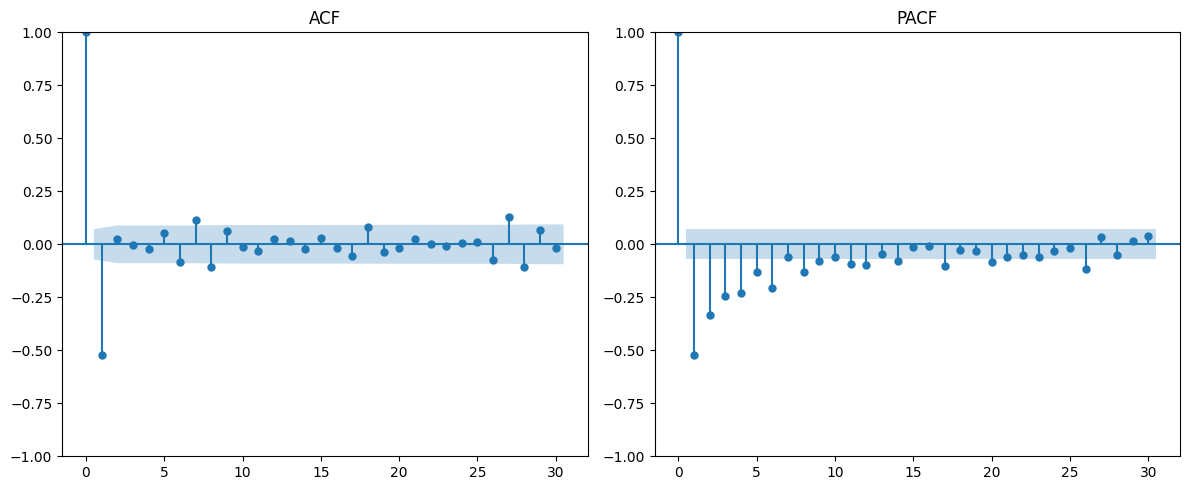

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(series_diff, lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(1,2,2)
plot_pacf(series_diff, lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF")
plt.tight_layout()
plt.show()

In [36]:
p, q = 1, 1

train_size = int(len(series_diff) * 0.8)
train = series_diff[:train_size]
test = series_diff[train_size:]

print("Training data size:", len(train))
print("Testing data size:", len(test))

Training data size: 600
Testing data size: 151


In [37]:
model = ARIMA(train, order=(p,0,q))
model_fit = model.fit()

print(model_fit.summary())
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)


                               SARIMAX Results                                
Dep. Variable:                  HbA1c   No. Observations:                  600
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -858.095
Date:                Fri, 30 Jan 2026   AIC                           1724.190
Time:                        13:08:52   BIC                           1741.777
Sample:                    02-29-2020   HQIC                          1731.036
                         - 01-31-2070                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.318e-05      0.000     -0.310      0.757      -0.001       0.000
ar.L1         -0.0569      0.041     -1.386      0.166      -0.137       0.024
ma.L1         -0.9999      0.321     -3.116      0.0

In [38]:
lb_test = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print("\nLjung-Box Test:")
print(lb_test)


Ljung-Box Test:
      lb_stat  lb_pvalue
10  10.072812   0.434129


In [39]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

In [40]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nAccuracy Metrics:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


Accuracy Metrics:
MAE : 1.0635062517463454
RMSE: 1.3605800509927835
MAPE: inf
